In [140]:
#import various of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [141]:
#importing data from files
df=pd.read_csv("D:/pandas4/Salesdata.csv",sep=",")
df

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


,Sales2015,Sales2016
Region,,
Central,7891728.86,9787808.73
East,9512916.49,12667230.45
West,5349744.64,7209689.43


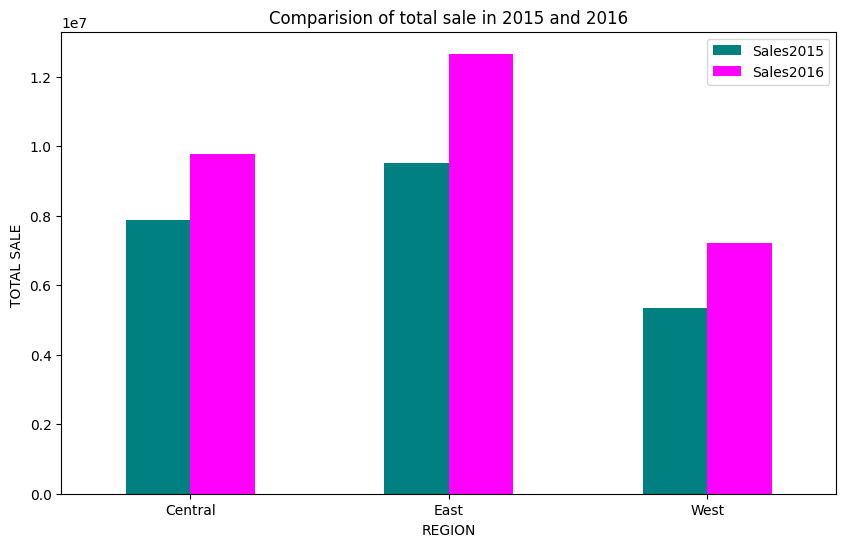

In [142]:
#graph 
pivot=round(pd.pivot_table(df,index=df['Region'],values=['Sales2015','Sales2016'],aggfunc='sum'),2)
display(pivot)
pivot.plot.bar(figsize=(10,6),color=['teal','fuchsia'])
plt.xticks(rotation=0)
plt.xlabel("REGION")
plt.ylabel("TOTAL SALE ")
plt.title("Comparision of total sale in 2015 and 2016")
plt.show()

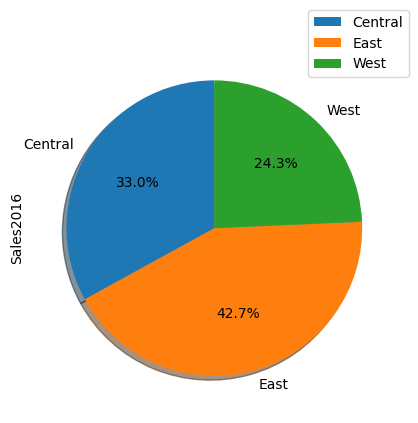

In [143]:
#pie chart
pv=pd.pivot_table(df,index='Region',values='Sales2016',aggfunc='sum')
pv.plot.pie(subplots=True,autopct="%.1f%%",startangle=90,shadow=True)
plt.legend(loc='center right',bbox_to_anchor=(1.045,1))
plt.show()

Sales2015   Sales2016
Region  Tier                        
Central High  4798698.43  6026042.94
        Low    943439.67  1132832.85
        Med   2068225.87  2632181.47
        Out     81364.89    -3248.53
East    High  6102946.12  7817151.10
        Low    901665.80  1144929.59
        Med   2470998.02  3705149.76
        Out     37306.55        0.00
West    High  2944789.26  3768038.35
        Low    671064.38  1099502.18
        Med   1718475.92  2342148.90
        Out     15415.08        0.00

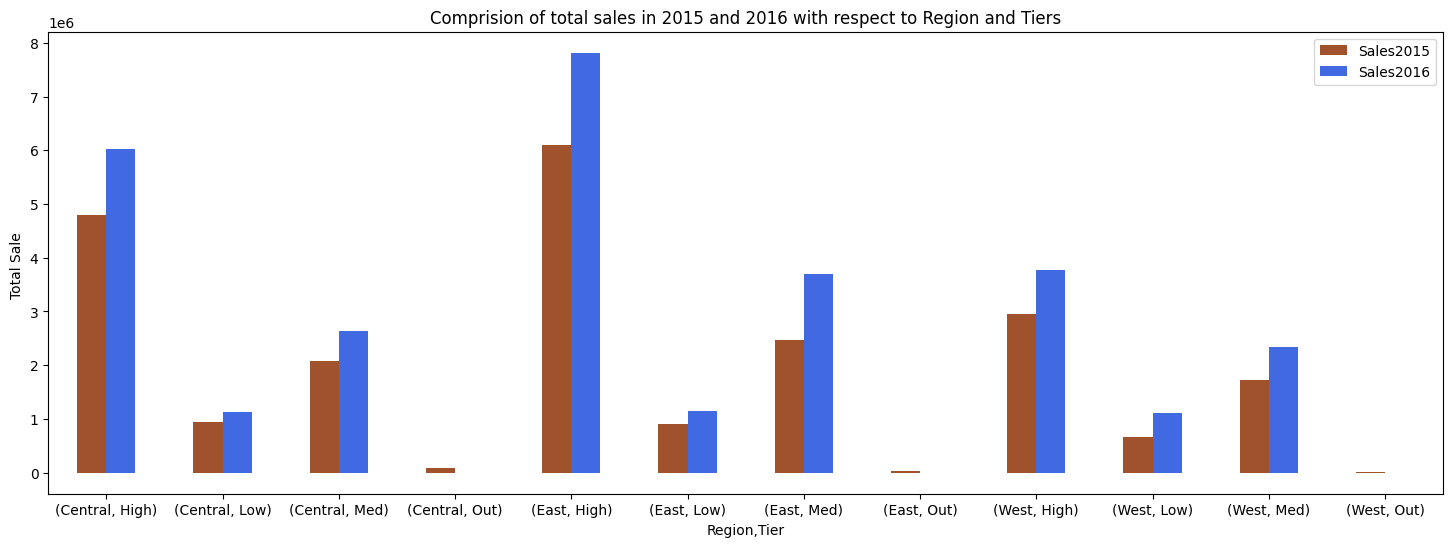

In [144]:
#graph
pov=round(pd.pivot_table(df,index=['Region','Tier'],values=['Sales2015','Sales2016'],aggfunc='sum'),2)
display(pov)
pov.plot.bar(figsize=(18,6),color=['sienna','royalblue'])
plt.title("Comprision of total sales in 2015 and 2016 with respect to Region and Tiers")
plt.ylabel("Total Sale ")
plt.xticks(rotation=0)
plt.show()

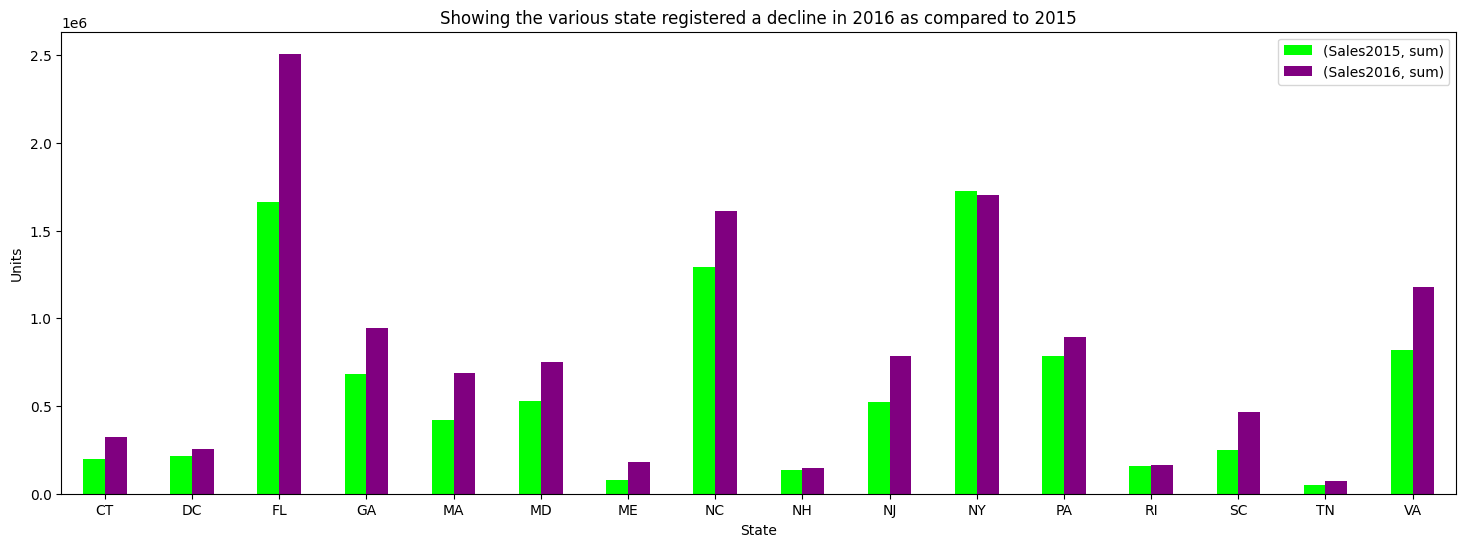

In [145]:
#graph
s=df.loc[df['Region']=='East']
state=s.groupby('State').aggregate({'Sales2015':['sum'],'Sales2016':['sum']})
graph=state.plot.bar(figsize=(18,6),color=['lime','purple'])
plt.legend()
plt.title("Showing the various state registered a decline in 2016 as compared to 2015")
plt.xticks(rotation=0)
plt.ylabel('Units')
plt.show()

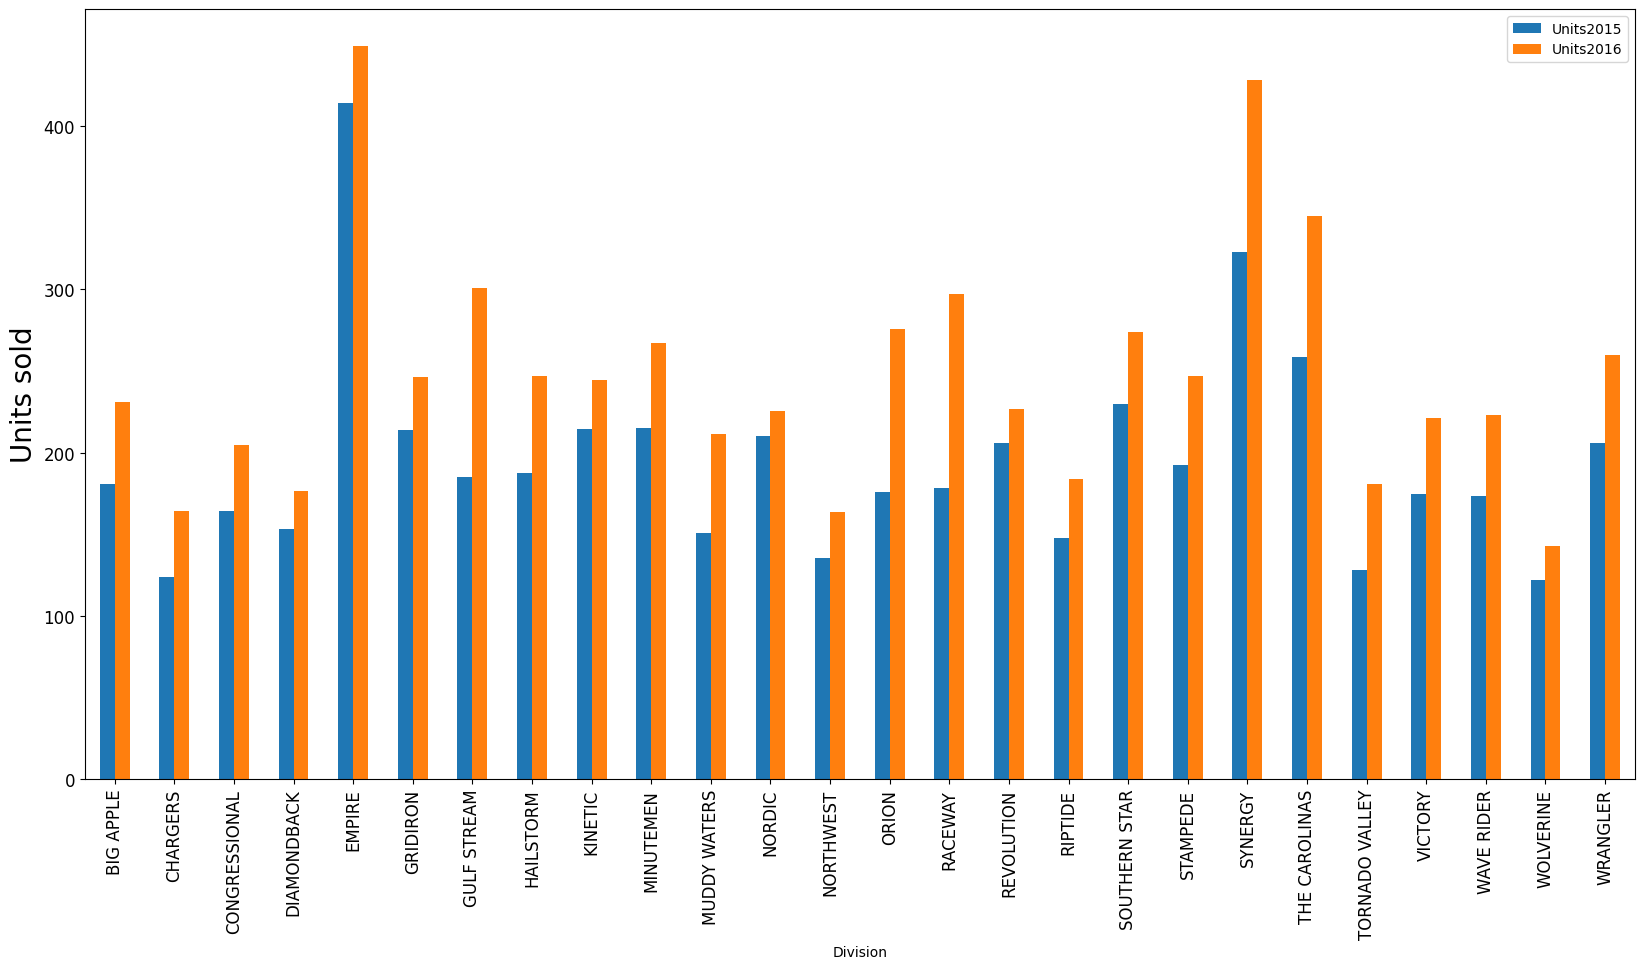

In [146]:
#graph
s=df.loc[df['Tier']=='High']
g=s.groupby(['Division'])[['Units2015','Units2016']].sum()
g.plot.bar(figsize=(20,10),fontsize=12)
plt.ylabel("Units sold",fontsize=20)
plt.show()

In [147]:
#adding new column Qtr
df.loc[(df['Month']=='Jan' )| (df['Month']=='Feb') | (df['Month']=='Mar'),'Qtr']='Q1'
df.loc[(df['Month']=='Apr') | (df['Month']=='May') | (df['Month']=='June'),'Qtr']='Q2'
df.loc[(df['Month']=='Jul') | (df['Month']=='Aug') | (df['Month']=='Sep'),'Qtr']='Q3'
df.loc[(df['Month']=='Oct') | (df['Month']=='Nov') | (df['Month']=='Dec'),'Qtr']='Q4'
df


,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,NaN
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14,Q1
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11,Q3
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55,Q4
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48,Q1


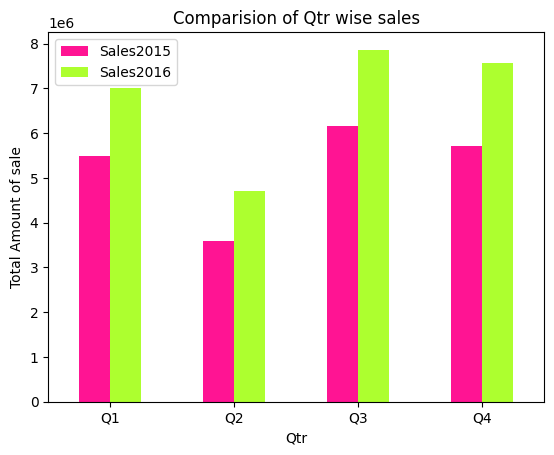

In [148]:
f=pd.pivot_table(df,index=['Qtr'],values=['Sales2015','Sales2016'],aggfunc='sum')
f.plot.bar(color=['deeppink','greenyellow'])
plt.xticks(rotation=0)
plt.title("Comparision of Qtr wise sales")
plt.ylabel("Total Amount of sale")
plt.show()

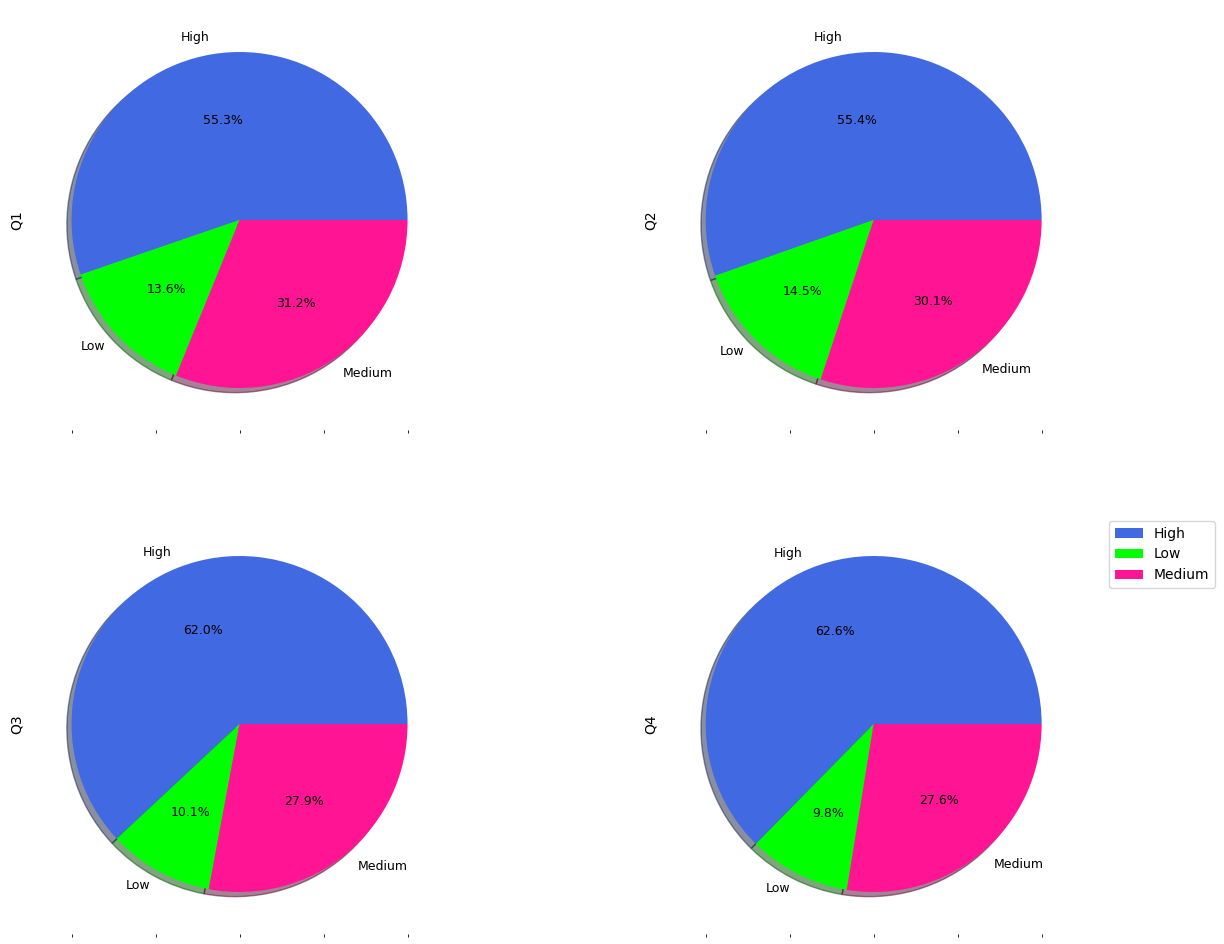

In [164]:
df1=df.loc[df['Tier']!='Out']
df1=df1.groupby(['Qtr','Tier'])[['Sales2016']].sum()
df1=df1.round(decimals=0)
df1=df1.stack()
df1
df1=df1.unstack(level=0)
df1
df1.plot.pie(labels=['High','Low','Medium'],colors=['royalblue','lime','deeppink'],subplots=True,shadow=True,autopct="%.1f%%",layout=(2,2),legend=False,figsize=(15,12),fontsize=9)
plt.legend(loc='upper left',bbox_to_anchor=(1.045,1))
plt.show()
